In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
data.reset_index(inplace=True)

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.201660,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.096336,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.756721,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.048668,23020500


In [8]:
ma_100_days = data.Close.rolling(100).mean()

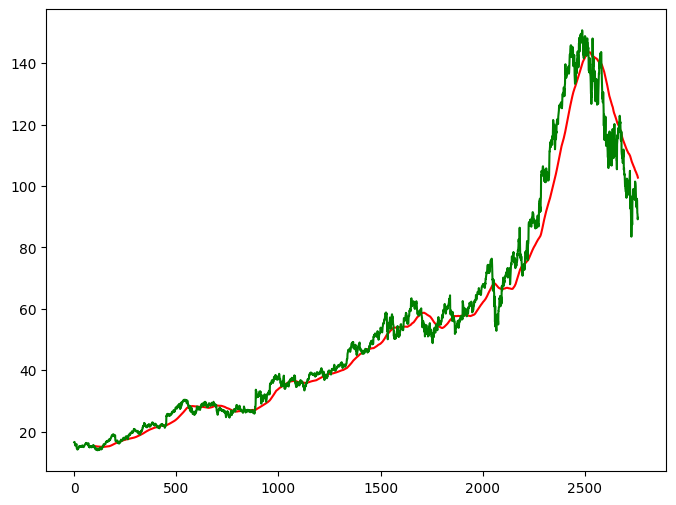

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
ma_200_days = data.Close.rolling(200).mean()

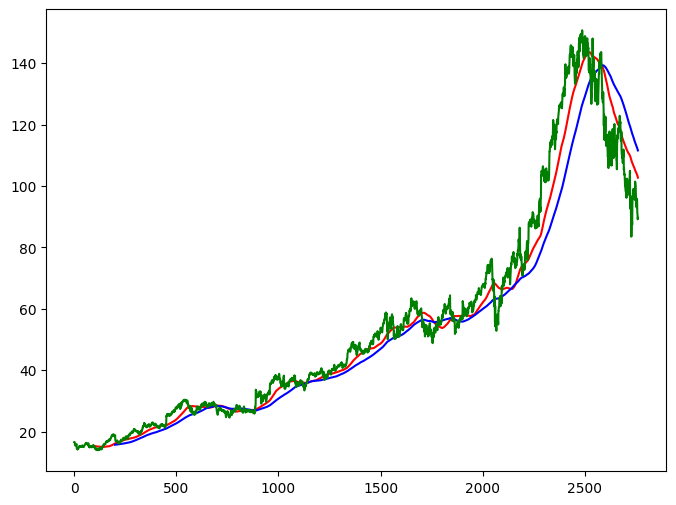

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [12]:
data.dropna(inplace=True)

In [13]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [14]:
data_train.shape[0]

2208

In [15]:
data_test.shape[0]

553

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale = scaler.fit_transform(data_train)

In [18]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [19]:
x, y = np.array(x), np.array(y)

In [34]:
import tensorflow as tf

print(tf.__version__)
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

2.16.2


In [30]:
model = Sequential()
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0077
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 0.0071
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0056
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0054
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.0051
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0042
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0049
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 0.0040
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - loss: 0.0038
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0034
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.0037
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0036
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0037
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0029
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - lo

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [37]:
pas_100_days = data_train.tail(100)

In [38]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [39]:
data_test_scale  =  scaler.fit_transform(data_test)

In [40]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [42]:
y_predict = model.predict(x)

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


In [41]:
scale =1/scaler.scale_

In [43]:
y_predict = y_predict*scale

In [44]:
y = y*scale

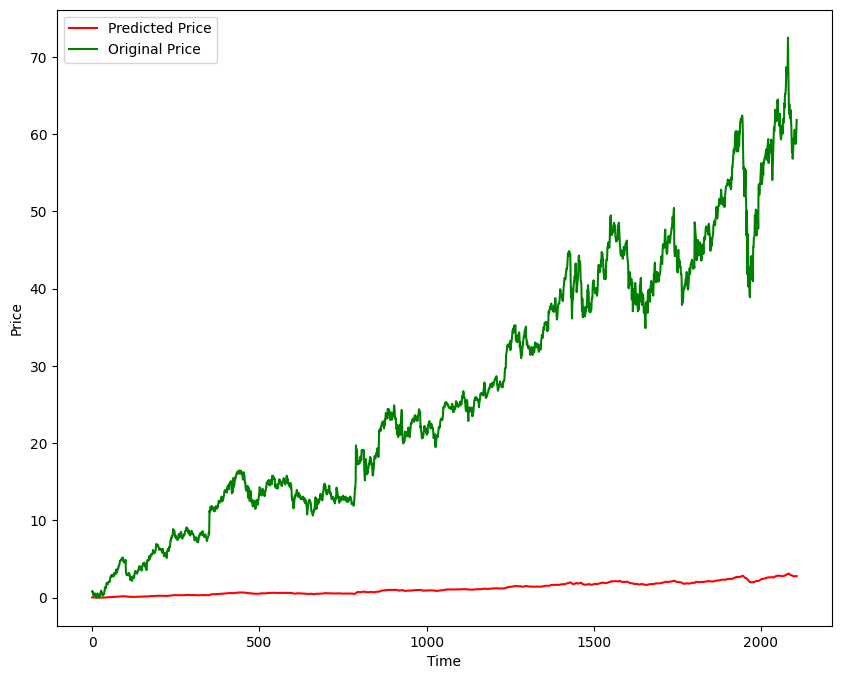

In [45]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
model.save('Stock Predictions Model.keras')